In [ ]:
import sys
import sklearn
import numpy as np
import scipy as scp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/CM148_Project1')

import os
import tarfile
import urllib

DATASET_PATH = sys.path[-1]

# TODO: Applying the end-end ML steps to a different dataset.

We will apply what we've learnt to another dataset ([NYC airbnb dataset from 2019](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)). We will predict airbnb price based on other features.

Note: You do not have to use only one cell when programming your code and can do it over multiple cells.

## [50 pts] Visualizing Data


### [10 pts] Load the data + statistics


#### - Load the dataset: airbnb/AB_NYC_2019.csv and display the first 5 few rows of the data

In [ ]:
#Defining a function to load dataset
def load_airbnb_data(dataset_path):
 csv_path = os.path.join(dataset_path, "AB_NYC_2019.csv")
 return pd.read_csv(csv_path)

#Running function to load the dataset
airbnb = load_airbnb_data(DATASET_PATH)

#Displaying first 5 rows of data
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### - Pull up info on the data type for each of the data fields. Will any of these be problematic feeding into your model (you may need to do a little research on this)? Discuss:

In [ ]:
#To display the datatype for each data field
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Ans: Might be problematic to feed categorical features (with type 'object') into a linear regression model since it makes little logical sense to try to plot host_name vs price for a homeownership model. It would also be difficult to try to plot neighbourhood vs price unless we use one hot encoding.

#### - Drop the following columns: name, id, host_id, host_name, last_review, and reviews_per_month and display first 5 rows

In [ ]:
#Dropping the specified columns
attributes = [
    "name",
    "id",
    "host_id",
    "host_name",
    "last_review",
    "reviews_per_month",
]

airbnb = airbnb.drop(attributes, axis=1)

#Displaying the first 5 rows of dropped dataset
airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


#### - Display a summary of the statistics of the loaded data using .describe

In [ ]:
#Displaying summary statistics of original airbnb loaded dataset
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


### [10 pts] Plot [boxplots](https://en.wikipedia.org/wiki/Box_plot) for the following 3 features: availability_365, number_of_reviews, price

You may use either pandas or matplotlib to plot the boxplot

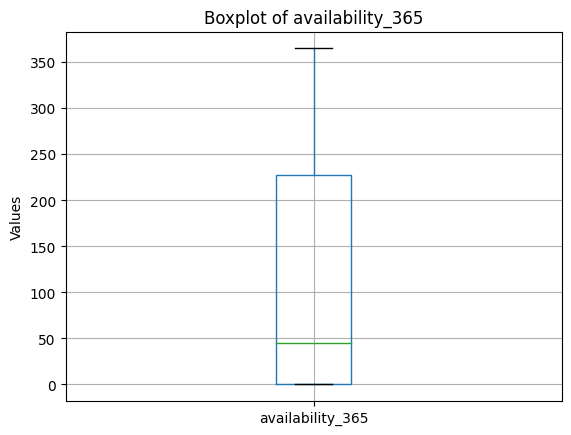

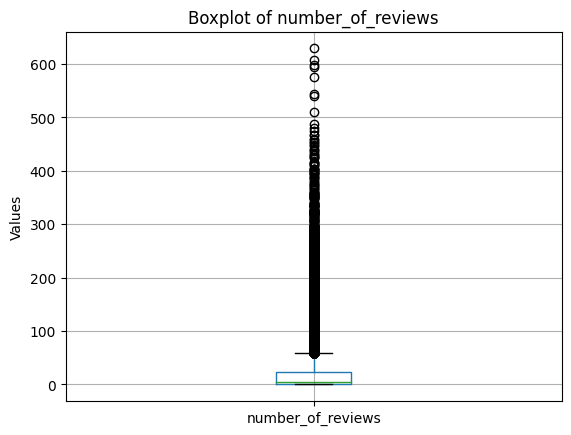

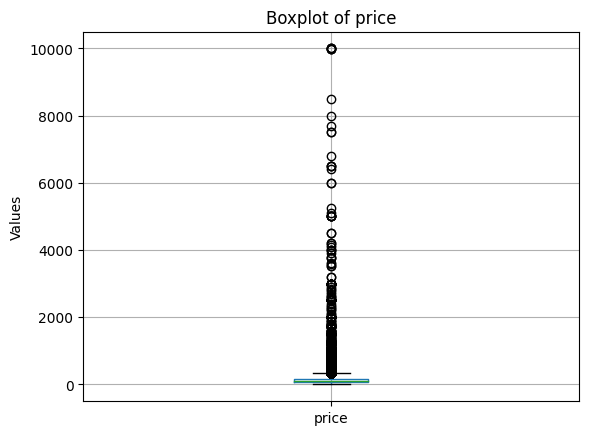

In [ ]:
features = ["availability_365", "number_of_reviews", "price"]
for f in features:
  airbnb[[f]].boxplot()
  plt.title(f"Boxplot of {f}")
  plt.ylabel("Values")
  plt.show()
  print("             ")

#### - What do you observe from the boxplot about the features? Anything suprising?

Ans: I was pretty surprised that the number_of_reviews had so many points classified as outliers, but that makes some sense since there are no bounds on the number of reviews, and similarly no upper bounds on the price range because in the real world, price can be 20k, 30k etc even though the highest value in this dataset is 10k. But for the number of days available, the values can range only between 0 and 365 so there were no outliers for this box plot as expected.

### [10 pts] Plot median price of a listing per neighbourhood_group using a bar plot

Text(0, 0.5, 'Median Price')

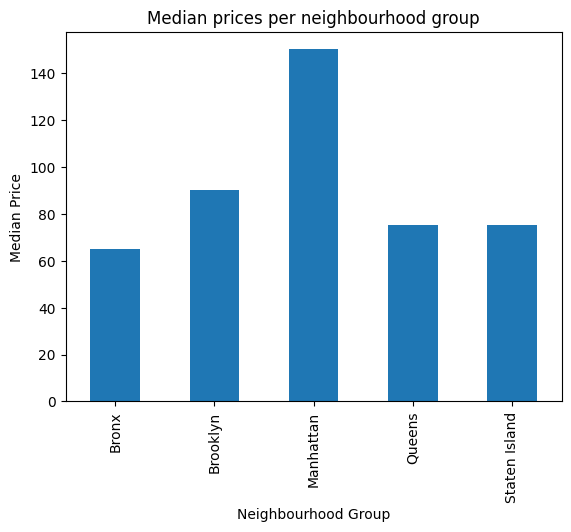

In [ ]:
#Grouping data by neighbourhood_group
neighbourhood_grouping = airbnb.groupby("neighbourhood_group")

#Computing median prices
median_prices = neighbourhood_grouping['price'].median()

#Plotting bar plot
dataframe = pd.Series(median_prices)
dataframe.plot(kind='bar')
plt.title("Median prices per neighbourhood group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Median Price")

#### - Describe what you expected to see with these features and what you actually observed

Ans: I expected some affluent neighbourhoods to have significantly higher median prices than the less affluent ones, and this was supported by the data. Manhattan is one of the most central and prominent places to live, so it makes sense that the prices here would be significantly higher than other neighbourhoods like Queens or Brooklyn.

#### - So we can see different neighborhoods have dramatically different pricepoints, but how does the price breakdown by range. To see let's do a histogram of price by neighborhood to get a better sense of the distribution.

To prevent outliers from affecting the histogram, use the input *range = [0,300]* in the histogram function which will upperbound the max price to 300 and ignore the outliers.

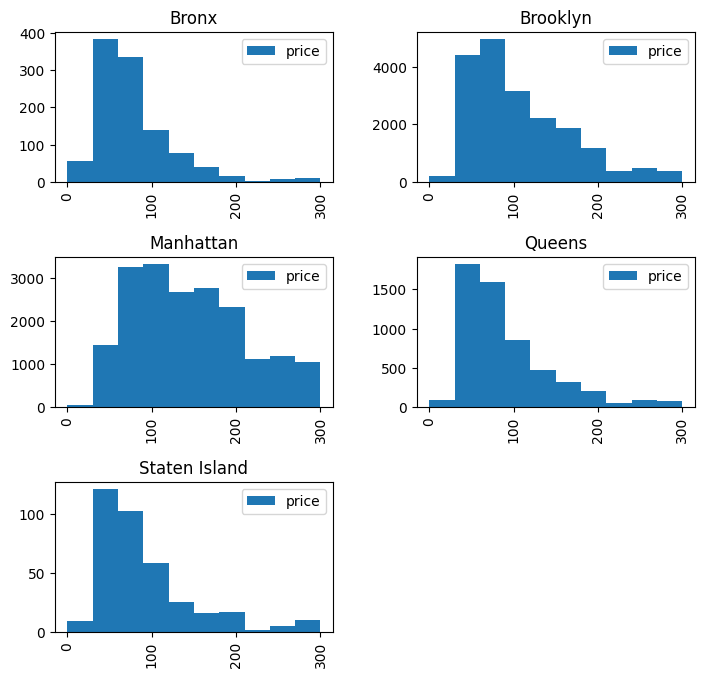

In [ ]:
airbnb.hist(column='price', by='neighbourhood_group', range=[0,300],legend=True, figsize=(8,8))
plt.title("Histogram: Price vs Neighbourhood")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### [5 pts] Plot a map of airbnbs throughout New York. You do not need to overlay a map.

Text(0.5, 1.0, 'Airbnbs throughout New York')

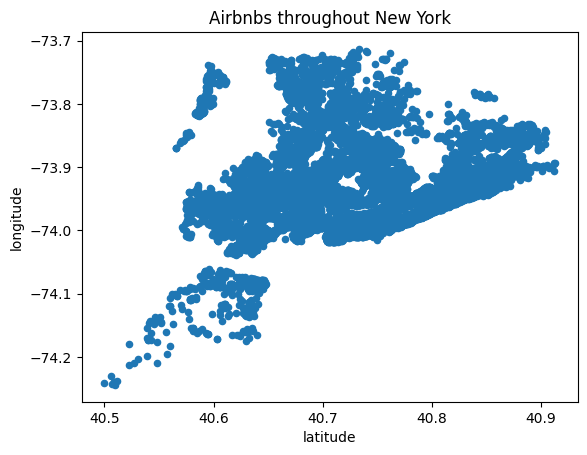

In [ ]:
airbnb.plot(kind='scatter',x='latitude', y='longitude')
plt.title("Airbnbs throughout New York")

### [10 pts] Plot median price of room types who have availability greater than 180 days and neighbourhood_group is Manhattan

Text(0, 0.5, 'Median Price')

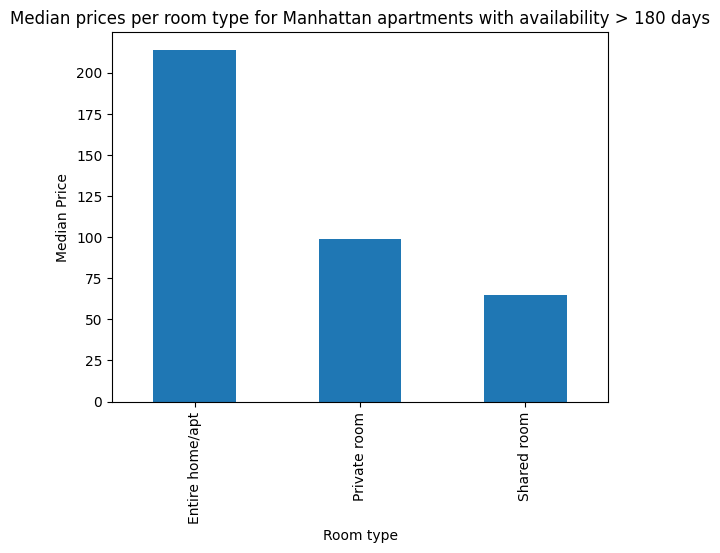

In [ ]:
manhattan_houses = neighbourhood_grouping.get_group("Manhattan")
to_plot = manhattan_houses[(manhattan_houses['availability_365']>180)]
to_plot = to_plot.groupby('room_type')
to_plot = to_plot['price'].median()

dataframe = pd.Series(to_plot)
dataframe.plot(kind='bar')
plt.title("Median prices per room type for Manhattan apartments with availability > 180 days")
plt.xlabel("Room type")
plt.ylabel("Median Price")

### [5 pts] Find features that correlate with price
Using the correlation matrix:
- which features have positive correlation with the price?
- which features have negative correlation with the price?


In [ ]:
corr_matrix = airbnb.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

Positive correlation with price: `availability_365, calculated_host_listings_count, minimum_nights, latitude`

Negative correlation with price: `number_of_reviews, longitude`

#### - Plot the full Scatter Matrix to see the correlation between prices and the other features

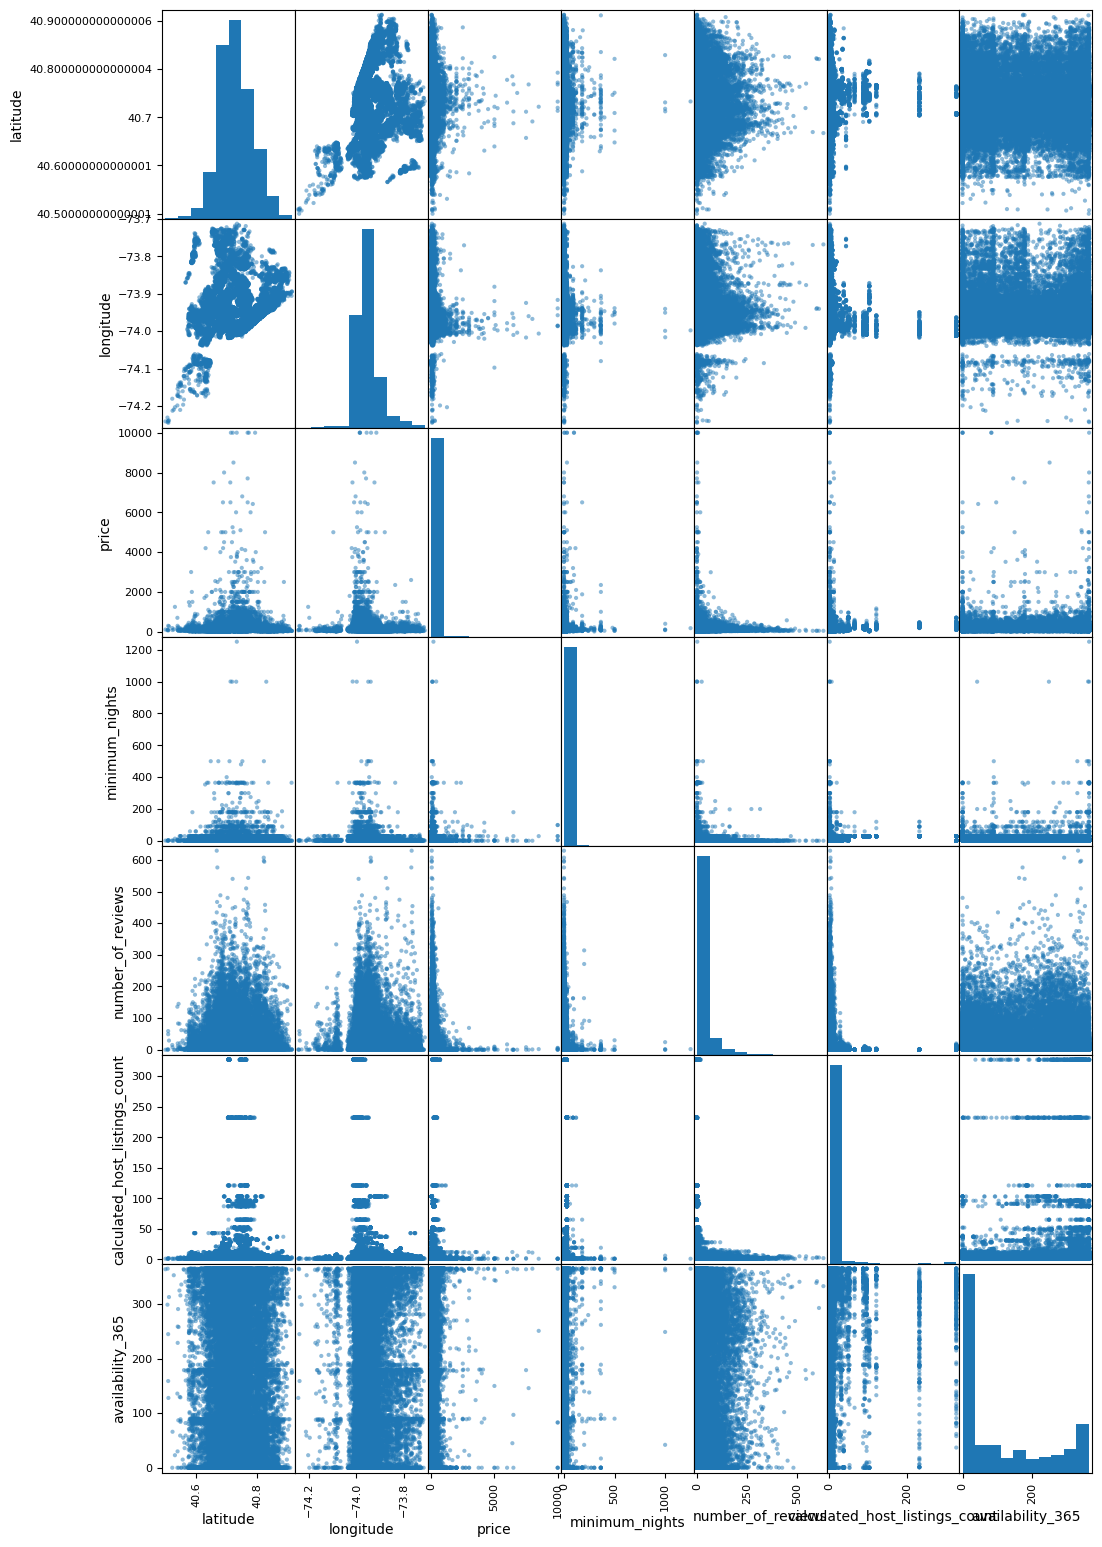

In [ ]:
from pandas.plotting import scatter_matrix
scatter = scatter_matrix(airbnb, figsize=(12,19))

## [30 pts] Prepare the Data

### [5 pts] Partition the data into the features and the target data. The target data is price. Then partition the feature data into categorical and numerical features.

In [ ]:
price_target = airbnb['price'] #target
feature_data = airbnb.drop(columns='price') #feature data

categorical_features = feature_data.select_dtypes(include=['object'])
numerical_features = feature_data.select_dtypes(exclude=['object'])

### [10 pts] Create a scikit learn Transformer that augments the numerical data with the following two features

- Max_yearly_bookings = availability_365 / minimum_nights

- Distance from airbnb to the NYC JFK Airport
    - Latitude: 40.641766 , Longitude: -73.780968

Make sure to append these new features in this order.

You may use the previously defined distance_func for the distance calculation.

Note that this Transformer will be applied after imputation so we do not have to worry about Nulls in the data.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class AugmentFeatures(BaseEstimator, TransformerMixin):
  def __init__(self):
    return None

  def fit(self, X):
    return self

  def transform(self,X):

    availability_365 = 5
    minimum_nights = 2
    latitude = 0
    longitude = 1

    max_yearly_bookings = X[:,availability_365]/X[:,minimum_nights]
    distance_to_JFK = self.distance_func(X[:,latitude], X[:,longitude])
    return np.c_[X, max_yearly_bookings, distance_to_JFK]

  def distance_func(self, lat1, lon1):
    """
    Calculates the haversine distance between coordinates
    on the latitude and longitude grid.
    Distance is in km.
    """
    lat2 = 40.641766
    lon2 = -73.780968

    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = (np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2)
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

#### -Test your new agumentation class by applying it to the numerical data you created. Print out the first 3 rows of the resultant data.

Do not worry about missing data since none of the features we used involved nulls.

In [ ]:
attribute_adder = AugmentFeatures()
numerical_data = numerical_features.values
augmentation_test = attribute_adder.transform(numerical_data)
print(augmentation_test[0:3])

[[ 40.64749    -73.97237      1.           9.           6.
  365.         365.          16.16      ]
 [ 40.75362    -73.98377      1.          45.           2.
  355.         355.          21.14      ]
 [ 40.80902    -73.9419       3.           0.           1.
  365.         121.66666667  23.02      ]]


### [10 pts] Create a sklearn pipeline that performs the following operations of the feature data

Now, we will create a full pipeline that processes the data before creating the model.

For the numerical data, perfrom the following operations in order:
- Use a SimpleImputer that imputes using the median value
- Use the custom feature augmentation made in the previous part
- Use StandardScaler to standardize the mean and standard deviation

For categorical features, perform the following:
- Perform one hot encoding on all the remaining categorical features: {neighbourhood_group, room_type}

**After making the pipeline, perform the transform operation on the feature data and print out the first 3 rows.**

In [ ]:
num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("attribs_adder", AugmentFeatures()),
        ("std_scaler", StandardScaler()),
    ]
)

num_features = ["availability_365", "calculated_host_listings_count","minimum_nights", "latitude",
                "number_of_reviews", "longitude"]
cat_features = ["neighbourhood_group", "room_type"]

full_pipeline = ColumnTransformer(
    [
      ("num", num_pipeline, num_features),
      ("cat", OneHotEncoder(), cat_features),
    ]
)

airbnb_processed = full_pipeline.fit_transform(airbnb)
print(airbnb_processed[0:3])

[[ 1.91625031e+00 -3.47164266e-02 -2.93996210e-01 -1.49384920e+00
  -3.20413582e-01 -4.37652087e-01 -1.52357197e+00 -1.57294594e-01
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 1.84027456e+00 -1.56104443e-01 -2.93996210e-01  4.52436023e-01
   4.87664928e-01 -6.84639148e-01 -1.52402246e+00  1.63722867e-03
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.91625031e+00 -1.86451447e-01 -1.96484417e-01  1.46839948e+00
  -5.22433210e-01  2.22496662e-01  4.25594350e-01 -3.24371470e-01
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]]


### [5 pts] Set aside 20% of the data as test test (80% train, 20% test). Apply previously created pipeline to the train and test data separately as shown in the introduction example.

In [ ]:
from sklearn.model_selection import train_test_split
data_target = airbnb["price"]
train, test, target, target_test = train_test_split(feature_data, price_target,
                                                   test_size = 0.2, random_state=0)

train = full_pipeline.fit_transform(train)
test = full_pipeline.fit_transform(test)

## [20 pts] Fit a Linear Regression Model

The task is to predict the price, you could refer to the housing example on how to train and evaluate your model using the mean squared error (MSE).
Provide both test and train set MSE values.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(train, target)

preds_train = lin_reg.predict(train)
mse_train = mean_squared_error(target, preds_train)
print("MSE Train:", mse_train)
print("RMSE Train:", np.sqrt(mse_train))


preds_test = lin_reg.predict(test)
mse_test = mean_squared_error(target_test, preds_test)
print("MSE Test:", mse_test)
print("RMSE Test:", np.sqrt(mse_test))

MSE Train: 52575.35280103505
RMSE Train: 229.2931590803246
MSE Test: 48457.49423197792
RMSE Test: 220.1306299268185


In [9]:
!jupyter nbconvert --to html CM148_Project1_Final

[NbConvertApp] WARNING | pattern 'CM148_Project1_Final' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
